In [162]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mp

## Read in files

In [2]:
# Clean up dates + times and combine into one column
first_week = pd.read_csv(r'http://web.mta.info/developers/data/nyct/turnstile/turnstile_220625.txt', parse_dates=[['DATE', 'TIME']])
second_week = pd.read_csv(r'http://web.mta.info/developers/data/nyct/turnstile/turnstile_220702.txt', parse_dates=[['DATE', 'TIME']])

In [3]:
first_week.head()

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,EXITS
0,2022-06-18 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7726949,2716406
1,2022-06-18 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7726955,2716414
2,2022-06-18 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7726964,2716438
3,2022-06-18 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7726999,2716522
4,2022-06-18 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7727100,2716564


In [4]:
second_week.head()

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,EXITS
0,2022-06-25 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7729818,2718760
1,2022-06-25 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7729828,2718769
2,2022-06-25 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7729835,2718793
3,2022-06-25 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7729863,2718853
4,2022-06-25 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7729932,2718904


## Main combined df of turnstile usage + pre-processing

In [5]:
# Union the two weeks together in one cleaned df & check if done correctly
combined = pd.concat([first_week, second_week])
print(len(first_week) + len(second_week) == len(combined))
combined.head()

True


,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,EXITS
0,2022-06-18 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7726949,2716406
1,2022-06-18 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7726955,2716414
2,2022-06-18 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7726964,2716438
3,2022-06-18 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7726999,2716522
4,2022-06-18 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7727100,2716564


In [6]:
# Clean up column names a bit
combined.columns = combined.columns.str.lower()
combined.columns = combined.columns.str.replace(' ','')
combined.sample(5)

,date_time,c/a,unit,scp,station,linename,division,desc,entries,exits
110171,2022-06-27 04:00:00,N550,R242,01-06-00,18 AV,F,IND,REGULAR,32562,21025
105458,2022-06-19 08:00:00,N523,R300,00-00-03,2 AV,F,IND,REGULAR,44624,43547
206753,2022-06-29 21:00:00,R637,R451,00-06-00,WINTHROP ST,25,IRT,REGULAR,19730,147588
185741,2022-06-30 20:00:00,R420,R107,00-00-02,WESTCHESTER SQ,6,IRT,REGULAR,1209210,1097611
163855,2022-06-25 04:00:00,R238,R046,00-07-02,GRD CNTRL-42 ST,4567S,IRT,REGULAR,40103,805040


In [7]:
# Add in a column to signify individual turnstiles per station
# ASSUMPTION: After reading the data dictionary, I assume that an individual turnstile can be identified by its SCP, which is unique within a C/A (Control Area) \
# which is unique within a Unit, which is unique to a station. So to group by individual turnstiles, we will need to group by these four clusters
combined['turnstile'] = combined["station"] + "_" + combined["c/a"] + "_" + combined["unit"] + "_" + combined["scp"]
combined.head()

,date_time,c/a,unit,scp,station,linename,division,desc,entries,exits,turnstile
0,2022-06-18 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7726949,2716406,59 ST_A002_R051_02-00-00
1,2022-06-18 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7726955,2716414,59 ST_A002_R051_02-00-00
2,2022-06-18 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7726964,2716438,59 ST_A002_R051_02-00-00
3,2022-06-18 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7726999,2716522,59 ST_A002_R051_02-00-00
4,2022-06-18 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7727100,2716564,59 ST_A002_R051_02-00-00


In [8]:
# Only keep regular audits in the desc column
combined = combined[(combined['desc'] == 'REGULAR')]

In [9]:
combined.sample(5)

,date_time,c/a,unit,scp,station,linename,division,desc,entries,exits,turnstile
121210,2022-06-18 13:05:33,PTH05,R543,00-00-00,EXCHANGE PLACE,1,PTH,REGULAR,338455,31030,EXCHANGE PLACE_PTH05_R543_00-00-00
95870,2022-06-26 04:00:00,N408A,R256,00-06-00,NASSAU AV,G,IND,REGULAR,53690,22174,NASSAU AV_N408A_R256_00-06-00
168042,2022-06-21 12:00:00,R245,R051,00-03-02,59 ST,456NQRW,IRT,REGULAR,30403,168355,59 ST_R245_R051_00-03-02
79955,2022-06-24 21:00:00,N301,R113,00-00-03,7 AV,BDE,IND,REGULAR,277378,415758,7 AV_N301_R113_00-00-03
181176,2022-06-30 17:00:00,R334,R367,00-00-00,233 ST,25,IRT,REGULAR,4648276,3998563,233 ST_R334_R367_00-00-00


## 23 St has the most units (6)

In [10]:
# Find Station with the most units
units_per_station = combined.groupby(['station']).agg({'unit':pd.Series.nunique}).sort_values(by = ['unit'], ascending = False)
units_per_station.head()

,unit
station,
23 ST,6
86 ST,5
CANAL ST,5
34 ST-PENN STA,4
125 ST,4


## There were 1,216,212 Entries and 1,732,002 Exits on June 30

In [11]:
# Find total number of entries and exits across the subway for June 30
# This will be the differnce in readings from June 30 at 00:00:00 and July 1 at 00:00:00 summed across all stations

In [30]:
starting_entries_june_30 = combined.loc[(combined['date_time'] == '2022-06-30 00:00:00'), 'entries'].sum()
starting_entries_july_1 = combined.loc[(combined['date_time'] == '2022-07-01 00:00:00'), 'entries'].sum()
starting_exits_june_30 = combined.loc[(combined['date_time'] == '2022-06-30 00:00:00'), 'exits'].sum()
starting_exits_july_1 = combined.loc[(combined['date_time'] == '2022-07-01 00:00:00'), 'exits'].sum()
print("June 30 starting entries: ", starting_entries_june_30)
print("July 1 starting entries: ", starting_entries_july_1)
print("June 30 starting exits: ", starting_exits_june_30)
print("July 1 starting exits: ", starting_exits_july_1)

June 30 starting entries:  119714626270
July 1 starting entries:  119715842482
June 30 starting exits:  97833000092
July 1 starting exits:  97834732094


In [24]:
print("Entries on June 30: ", starting_entries_july_1 - starting_entries_june_30)
print("Exits on June 30: ", starting_exits_july_1 - starting_exits_june_30)

Entries on June 30:  1216212
Exits on June 30:  1732002


## 34 ST-PENN STATION was the busiest station on June 30.
## Turnstile 00-00-00 in C/A N063A, Unit R011, in 42 St Port Authority Station was the busiest turnstile on June 30.

In [31]:
#Odometer of entries and exits per station on June 30th start 
combined_busiest_starting_june_30 = combined[(combined['date_time'] >= '2022-06-30 00:00:00')]
combined_busiest_starting_june_30 = combined_busiest_starting_june_30.loc[combined_busiest_starting_june_30.groupby('turnstile').date_time.idxmin()].reset_index(drop=True)
combined_busiest_starting_june_30["entries_plus_exits"] = combined_busiest_starting_june_30["entries"] + combined_busiest_starting_june_30["exits"]
combined_busiest_starting_june_30 = combined_busiest_starting_june_30.groupby('station', as_index = False)["entries_plus_exits"].sum()
combined_busiest_starting_june_30.head()

,station,entries_plus_exits
0,1 AV,912159741
1,103 ST,263654563
2,103 ST-CORONA,140651768
3,104 ST,2667048210
4,110 ST,86386372


In [32]:
#Odometer of entries and exits per station on June 30th start 
combined_busiest_starting_july_1 = combined[(combined['date_time'] >= '2022-07-01 00:00:00')]
combined_busiest_starting_july_1 = combined_busiest_starting_july_1.loc[combined_busiest_starting_july_1.groupby('turnstile').date_time.idxmin()].reset_index(drop=True)
combined_busiest_starting_july_1["entries_plus_exits"] = combined_busiest_starting_july_1["entries"] + combined_busiest_starting_july_1["exits"]
combined_busiest_starting_july_1 = combined_busiest_starting_july_1.groupby('station', as_index = False)["entries_plus_exits"].sum()
combined_busiest_starting_july_1.head()

,station,entries_plus_exits
0,1 AV,912184634
1,103 ST,263682966
2,103 ST-CORONA,140676392
3,104 ST,2667051613
4,110 ST,86397567


In [33]:
# Joining the two dataframes together
combined_busiest_sum = pd.merge(combined_busiest_starting_june_30, combined_busiest_starting_july_1, how = "inner", on = ["station", "station"])
combined_busiest_sum = combined_busiest_sum.rename(columns = {"entries_plus_exits_x": "june_30_total", "entries_plus_exits_y": "july_1_total"})
combined_busiest_sum.head()

,station,june_30_total,july_1_total
0,1 AV,912159741,912184634
1,103 ST,263654563,263682966
2,103 ST-CORONA,140651768,140676392
3,104 ST,2667048210,2667051613
4,110 ST,86386372,86397567


In [205]:
# Herald Square was the busiest station on June 30
combined_busiest_sum["june_30_busyness"] = combined_busiest_sum["july_1_total"] - combined_busiest_sum["june_30_total"]
combined_busiest_sum = combined_busiest_sum.sort_values(by = ['june_30_busyness'], ascending = False)
combined_busiest_sum.head(10)

,station,june_30_total,july_1_total,june_30_busyness
129,AVENUE J,40688460,41216887,528427
61,34 ST-PENN STA,8513912438,8514069975,157537
233,GRD CNTRL-42 ST,4026958872,4027089361,130489
59,34 ST-HERALD SQ,7092518326,7092629589,111263
353,TIMES SQ-42 ST,9966871450,9966968497,97047
110,86 ST,3231309818,3231400253,90435
46,23 ST,11545903690,11545992053,88363
226,FULTON ST,12509961388,12510048250,86862
14,14 ST-UNION SQ,450120962,450207801,86839
68,42 ST-PORT AUTH,13762989506,13763071622,82116


In [55]:
# Gap between leading station and the rest seemed suspicious, so when checking it out, it is buggy data. There is a huge jump between June 30 and July 1 causing that big lead
combined[(combined['date_time'] >= '2022-06-30 00:00:00') & (combined['station'] == "AVENUE J")]

,date_time,c/a,unit,scp,station,linename,division,desc,entries,exits,turnstile
16618,2022-06-30 00:00:00,B021,R228,00-00-00,AVENUE J,BQ,BMT,REGULAR,9614881,8227916,AVENUE J_B021_R228_00-00-00
16619,2022-06-30 04:00:00,B021,R228,00-00-00,AVENUE J,BQ,BMT,REGULAR,9614884,8227929,AVENUE J_B021_R228_00-00-00
16620,2022-06-30 08:00:00,B021,R228,00-00-00,AVENUE J,BQ,BMT,REGULAR,9614942,8227973,AVENUE J_B021_R228_00-00-00
16621,2022-06-30 12:00:00,B021,R228,00-00-00,AVENUE J,BQ,BMT,REGULAR,9615010,8228084,AVENUE J_B021_R228_00-00-00
16622,2022-06-30 16:00:00,B021,R228,00-00-00,AVENUE J,BQ,BMT,REGULAR,9615046,8228206,AVENUE J_B021_R228_00-00-00
...,...,...,...,...,...,...,...,...,...,...,...
17096,2022-07-01 04:00:00,B021,R228,00-05-02,AVENUE J,BQ,BMT,REGULAR,2222630,1102538,AVENUE J_B021_R228_00-05-02
17097,2022-07-01 08:00:00,B021,R228,00-05-02,AVENUE J,BQ,BMT,REGULAR,2222725,1102558,AVENUE J_B021_R228_00-05-02
17098,2022-07-01 12:00:00,B021,R228,00-05-02,AVENUE J,BQ,BMT,REGULAR,2222835,1102604,AVENUE J_B021_R228_00-05-02
17099,2022-07-01 16:00:00,B021,R228,00-05-02,AVENUE J,BQ,BMT,REGULAR,2222909,1102670,AVENUE J_B021_R228_00-05-02


In [56]:
# Declare the second hgihest station the victor as results more reasonable
# Gap between leading station and the rest seemed suspicious, so when checking it out, it is buggy data. There is a huge jump between June 30 and July 1 causing that big lead
combined[(combined['date_time'] >= '2022-06-30 00:00:00') & (combined['station'] == "34 ST-PENN STA")]

,date_time,c/a,unit,scp,station,linename,division,desc,entries,exits,turnstile
55842,2022-06-30 00:00:00,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,REGULAR,390584,1140230,34 ST-PENN STA_N067_R012_00-00-00
55843,2022-06-30 04:00:00,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,REGULAR,390584,1140235,34 ST-PENN STA_N067_R012_00-00-00
55844,2022-06-30 08:00:00,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,REGULAR,390673,1140427,34 ST-PENN STA_N067_R012_00-00-00
55845,2022-06-30 12:00:00,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,REGULAR,390758,1140763,34 ST-PENN STA_N067_R012_00-00-00
55846,2022-06-30 16:00:00,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,REGULAR,390853,1141042,34 ST-PENN STA_N067_R012_00-00-00
...,...,...,...,...,...,...,...,...,...,...,...
140874,2022-07-01 06:00:00,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,REGULAR,68162815,18975574,34 ST-PENN STA_R142_R293_01-06-01
140875,2022-07-01 10:00:00,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,REGULAR,68162854,18975740,34 ST-PENN STA_R142_R293_01-06-01
140876,2022-07-01 14:00:00,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,REGULAR,68162955,18975903,34 ST-PENN STA_R142_R293_01-06-01
140877,2022-07-01 18:00:00,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,REGULAR,68163021,18976115,34 ST-PENN STA_R142_R293_01-06-01


In [10]:
# Repeat a similar procedure but with turnstiles instead of stations. 

In [37]:
#Odometer of entries and exits per turnstile on June 30th start 
combined_busiest_turnstile_starting_june_30 = combined[(combined['date_time'] >= '2022-06-30 00:00:00')]
combined_busiest_turnstile_starting_june_30 = combined_busiest_turnstile_starting_june_30.loc[combined_busiest_turnstile_starting_june_30.groupby('turnstile').date_time.idxmin()].reset_index(drop=True)
combined_busiest_turnstile_starting_june_30["entries_plus_exits"] = combined_busiest_turnstile_starting_june_30["entries"] + combined_busiest_turnstile_starting_june_30["exits"]
combined_busiest_turnstile_starting_june_30 = combined_busiest_turnstile_starting_june_30.groupby('turnstile', as_index = False)["entries_plus_exits"].sum()
combined_busiest_turnstile_starting_june_30.head()

,turnstile,entries_plus_exits
0,1 AV_H007A_R248_02-00-00,56183
1,1 AV_H007A_R248_02-00-01,82175
2,1 AV_H007A_R248_02-00-02,63839
3,1 AV_H007A_R248_02-00-03,98264
4,1 AV_H007A_R248_02-00-04,106456


In [38]:
#Odometer of entries and exits per turnstile on July 1st start 
combined_busiest_turnstile_starting_july_1 = combined[(combined['date_time'] >= '2022-07-01 00:00:00')]
combined_busiest_turnstile_starting_july_1 = combined_busiest_turnstile_starting_july_1.loc[combined_busiest_turnstile_starting_july_1.groupby('turnstile').date_time.idxmin()].reset_index(drop=True)
combined_busiest_turnstile_starting_july_1["entries_plus_exits"] = combined_busiest_turnstile_starting_july_1["entries"] + combined_busiest_turnstile_starting_july_1["exits"]
combined_busiest_turnstile_starting_july_1 = combined_busiest_turnstile_starting_july_1.groupby('turnstile', as_index = False)["entries_plus_exits"].sum()
combined_busiest_turnstile_starting_july_1.head()

,turnstile,entries_plus_exits
0,1 AV_H007A_R248_02-00-00,57177
1,1 AV_H007A_R248_02-00-01,82900
2,1 AV_H007A_R248_02-00-02,64521
3,1 AV_H007A_R248_02-00-03,99057
4,1 AV_H007A_R248_02-00-04,108084


In [39]:
# Joining the two dataframes together
combined_busiest_turnstile_sum = pd.merge(combined_busiest_turnstile_starting_june_30, combined_busiest_turnstile_starting_july_1, how = "inner", on = ["turnstile", "turnstile"])
combined_busiest_turnstile_sum = combined_busiest_turnstile_sum.rename(columns = {"entries_plus_exits_x": "june_30_total", "entries_plus_exits_y": "july_1_total"})
combined_busiest_turnstile_sum.head()

,turnstile,june_30_total,july_1_total
0,1 AV_H007A_R248_02-00-00,56183,57177
1,1 AV_H007A_R248_02-00-01,82175,82900
2,1 AV_H007A_R248_02-00-02,63839,64521
3,1 AV_H007A_R248_02-00-03,98264,99057
4,1 AV_H007A_R248_02-00-04,106456,108084


In [41]:
# This turnstile was the busiest on June 30th
combined_busiest_turnstile_sum["june_30_busyness"] = combined_busiest_turnstile_sum["july_1_total"] - combined_busiest_turnstile_sum["june_30_total"]
combined_busiest_turnstile_sum = combined_busiest_turnstile_sum.sort_values(by = ['june_30_busyness'], ascending = False)
combined_busiest_turnstile_sum.head(10)

,turnstile,june_30_total,july_1_total,june_30_busyness
2026,AVENUE J_B021_R228_00-04-00,669,524291,523622
1068,42 ST-PORT AUTH_N063A_R011_00-00-00,13680783,13687755,6972
4339,PATH WTC 2_PTH21_R540_01-00-00,35193,41728,6535
3350,GRD CNTRL-42 ST_R240_R047_00-00-00,23553607,23560058,6451
3343,GRD CNTRL-42 ST_R238_R046_00-06-00,2071193,2077516,6323
836,34 ST-HERALD SQ_N506_R022_00-05-05,6834024,6840193,6169
4828,W 4 ST-WASH SQ_N083_R138_01-00-00,39053548,39059700,6152
5021,YORK ST_N530_R301_00-00-00,2309077,2315088,6011
3345,GRD CNTRL-42 ST_R238_R046_00-06-02,2725436,2731398,5962
1069,42 ST-PORT AUTH_N063A_R011_00-00-01,1462294846,1462300758,5912


In [53]:
# Gap between leading turnstile and the rest seemed suspicious, so when checking it out, it is buggy data. There is a huge jump between June 30 and July 1 causing that big lead
combined[(combined['date_time'] >= '2022-06-30 00:00:00') & (combined['turnstile'] == "AVENUE J_B021_R228_00-04-00")]

,date_time,c/a,unit,scp,station,linename,division,desc,entries,exits,turnstile
16936,2022-06-30 00:00:00,B021,R228,00-04-00,AVENUE J,BQ,BMT,REGULAR,652,17,AVENUE J_B021_R228_00-04-00
16937,2022-06-30 04:00:00,B021,R228,00-04-00,AVENUE J,BQ,BMT,REGULAR,652,17,AVENUE J_B021_R228_00-04-00
16938,2022-06-30 08:00:00,B021,R228,00-04-00,AVENUE J,BQ,BMT,REGULAR,652,17,AVENUE J_B021_R228_00-04-00
16939,2022-07-01 12:00:00,B021,R228,00-04-00,AVENUE J,BQ,BMT,REGULAR,524291,0,AVENUE J_B021_R228_00-04-00
16940,2022-07-01 16:00:00,B021,R228,00-04-00,AVENUE J,BQ,BMT,REGULAR,524292,0,AVENUE J_B021_R228_00-04-00
16941,2022-07-01 20:00:00,B021,R228,00-04-00,AVENUE J,BQ,BMT,REGULAR,524292,0,AVENUE J_B021_R228_00-04-00


In [54]:
#Second highest turnstile seems more reasonable, so declare that as true highest
combined[(combined['date_time'] >= '2022-06-30 00:00:00') & (combined['turnstile'] == "42 ST-PORT AUTH_N063A_R011_00-00-00")]

,date_time,c/a,unit,scp,station,linename,division,desc,entries,exits,turnstile
55338,2022-06-30 00:00:00,N063A,R011,00-00-00,42 ST-PORT AUTH,ACENQRS1237W,IND,REGULAR,2407334,11273449,42 ST-PORT AUTH_N063A_R011_00-00-00
55339,2022-06-30 04:00:00,N063A,R011,00-00-00,42 ST-PORT AUTH,ACENQRS1237W,IND,REGULAR,2407340,11273506,42 ST-PORT AUTH_N063A_R011_00-00-00
55340,2022-06-30 08:00:00,N063A,R011,00-00-00,42 ST-PORT AUTH,ACENQRS1237W,IND,REGULAR,2407615,11274244,42 ST-PORT AUTH_N063A_R011_00-00-00
55341,2022-06-30 12:00:00,N063A,R011,00-00-00,42 ST-PORT AUTH,ACENQRS1237W,IND,REGULAR,2407915,11275428,42 ST-PORT AUTH_N063A_R011_00-00-00
55342,2022-06-30 16:00:00,N063A,R011,00-00-00,42 ST-PORT AUTH,ACENQRS1237W,IND,REGULAR,2408025,11276667,42 ST-PORT AUTH_N063A_R011_00-00-00
55343,2022-06-30 20:00:00,N063A,R011,00-00-00,42 ST-PORT AUTH,ACENQRS1237W,IND,REGULAR,2408092,11279001,42 ST-PORT AUTH_N063A_R011_00-00-00
55344,2022-07-01 00:00:00,N063A,R011,00-00-00,42 ST-PORT AUTH,ACENQRS1237W,IND,REGULAR,2408136,11279619,42 ST-PORT AUTH_N063A_R011_00-00-00
55345,2022-07-01 04:00:00,N063A,R011,00-00-00,42 ST-PORT AUTH,ACENQRS1237W,IND,REGULAR,2408146,11279683,42 ST-PORT AUTH_N063A_R011_00-00-00
55346,2022-07-01 08:00:00,N063A,R011,00-00-00,42 ST-PORT AUTH,ACENQRS1237W,IND,REGULAR,2408393,11280321,42 ST-PORT AUTH_N063A_R011_00-00-00
55347,2022-07-01 12:00:00,N063A,R011,00-00-00,42 ST-PORT AUTH,ACENQRS1237W,IND,REGULAR,2408630,11281371,42 ST-PORT AUTH_N063A_R011_00-00-00


## Looking into which data seems corrupted by broken machines/bad reading, and providing strategies to solve for that

In [57]:
# Quick checks to find if a station has broken/bad data
# Check if odometer readings ever decrease. Since it is a cumulative count, they should never decrease.

In [60]:
#Check if each individual turnstile's reading is monotonic
entries_increasing_bool = combined.groupby('turnstile', as_index=False)['entries'].apply(lambda x: x.is_monotonic_increasing)
entries_increasing_bool.sample(5)

,turnstile,entries
1095,46 ST BLISS ST_R519_R223_00-00-01,True
2100,BAY PKWY_D010_R394_00-00-03,True
2235,BERGEN ST_R618_R058_01-06-01,True
2433,CANAL ST_A046_R463_00-05-03,True
1563,72 ST-2 AVE_N700A_R570_01-00-00,True


In [61]:
# Bad entries are those that are not monotonically increasing
bad_entries = entries_increasing_bool[(entries_increasing_bool['entries']) == False]
print(len(bad_entries))
bad_entries.sample(5)

87


,turnstile,entries
3891,LEXINGTON AV/63_N601_R319_00-00-01,False
4331,PATH NEW WTC_PTH22_R540_00-03-05,False
3568,JAMAICA 179 ST_N342_R019_01-03-02,False
3868,LEXINGTON AV/53_N305_R017_01-03-04,False
2104,BAY PKWY_D011_R394_01-06-01,False


We can identify the above 87 turnstiles as ones that have a decreasing number of entries at some point (which is impossible in an odometer reading) and claim that as bad data and remove these turnstiles

In [62]:
# Do a similar procedure to see exits that have non-monotonically increasing counts
exits_increasing_bool = combined.groupby('turnstile', as_index=False)['exits'].apply(lambda x: x.is_monotonic_increasing)
exits_increasing_bool.sample(5)

,turnstile,exits
4153,NEWARK C_PTH19_R549_02-01-06,True
2813,CYPRESS AV_R405_R447_01-00-00,True
2377,BROOK AV_R403_R446_01-00-01,True
4210,NORTHERN BLVD_N318_R298_00-00-00,True
1524,68ST-HUNTER CO_R246_R177_00-03-02,True


In [63]:
bad_exits = exits_increasing_bool[(exits_increasing_bool['exits']) == False]
print(len(bad_exits))
bad_exits.sample(5)

65


,turnstile,exits
363,161/YANKEE STAD_N205_R195_02-00-00,False
3101,FRANKLIN ST_R117_R343_00-00-00,False
4331,PATH NEW WTC_PTH22_R540_00-03-05,False
3102,FRANKLIN ST_R117_R343_00-00-01,False
236,14 ST_N078_R175_01-00-03,False


We can identify the above 65 turnstiles as ones that have a decreasing number of exits at some point (which is impossible in an odometer reading) and claim that as bad data and remove these turnstiles

In [206]:
# Check to see which turnstiles have excessively high jumps within 2 readings and eliminate their data. 
# Let's take an excessively high jump to mean it increased by more than 10% within consecutive readings and the readings have at least 1000 on their odometer
# , which would be quite unlikely given the frequency of the readings + odometer measurements.
combined_groups = combined.copy()
combined_groups['pct_change_entries'] = combined_groups.groupby('turnstile')['entries'].pct_change()
combined_groups['pct_change_exits'] = combined_groups.groupby('turnstile')['exits'].pct_change()
combined_groups.head()

,date_time,c/a,unit,scp,station,linename,division,desc,entries,exits,turnstile,pct_change_entries,pct_change_exits
0,2022-06-18 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7726949,2716406,59 ST_A002_R051_02-00-00,NaN,NaN
1,2022-06-18 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7726955,2716414,59 ST_A002_R051_02-00-00,7.765031e-07,0.000003
2,2022-06-18 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7726964,2716438,59 ST_A002_R051_02-00-00,1.164754e-06,0.000009
3,2022-06-18 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7726999,2716522,59 ST_A002_R051_02-00-00,4.529593e-06,0.000031
4,2022-06-18 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7727100,2716564,59 ST_A002_R051_02-00-00,1.307105e-05,0.000015


In [211]:
#Now we have percentage changes, let's get all the distinct stations where any pct_change >= .10
combined_groups_to_exclude = combined_groups[((combined_groups['pct_change_entries'] >= .10) & (combined_groups['entries'] >= 1000)) | ((combined_groups['pct_change_exits'] >= .10) & (combined_groups['exits'] >= 1000))]
print(combined_groups_to_exclude['turnstile'].nunique())
combined_groups_to_exclude.sample(5)

201


,date_time,c/a,unit,scp,station,linename,division,desc,entries,exits,turnstile,pct_change_entries,pct_change_exits
118579,2022-06-30 10:03:01,PTH02,R544,00-03-02,HARRISON,1,PTH,REGULAR,1812,104,HARRISON_PTH02_R544_00-03-02,0.231815,0.061224
122510,2022-06-23 00:52:12,PTH07,R550,00-00-00,CITY / BUS,1,PTH,REGULAR,212153,194215,CITY / BUS_PTH07_R550_00-00-00,2.158449,0.192161
129631,2022-06-26 20:04:00,PTH22,R540,00-02-00,PATH NEW WTC,1,PTH,REGULAR,1248,1228,PATH NEW WTC_PTH22_R540_00-02-00,0.102473,0.044218
129467,2022-06-26 02:04:25,PTH22,R540,00-01-04,PATH NEW WTC,1,PTH,REGULAR,1397,1128,PATH NEW WTC_PTH22_R540_00-01-04,0.127522,0.044444
121849,2022-06-27 14:28:46,PTH06,R546,00-00-00,PAVONIA/NEWPORT,1,PTH,REGULAR,529308,168332,PAVONIA/NEWPORT_PTH06_R546_00-00-00,0.181354,-0.396893


There are 36 turnstiles that have a large jump in entries/exits and should be eliminated moving forward

In [107]:
# We would also expect turnstiles to have a gain a similar number of entries and exits between readings. 
# See if any turnstile has more than 20% either entries or exits compared to the other and delete as that data is probably deprecated. 
# Set a minimum of 500 for the odometer reading of entries/exits to avoid relative changes hampered by small numbers
combined_check_entries_vs_exits = combined.copy()
combined_check_entries_vs_exits['entries_delta'] = combined_check_entries_vs_exits.groupby('turnstile')['entries'].pct_change()
combined_check_entries_vs_exits['exits_delta'] = combined_check_entries_vs_exits.groupby('turnstile')['exits'].pct_change()
combined_check_entries_vs_exits['entries_over_exits'] = combined_check_entries_vs_exits['entries_delta']/combined_check_entries_vs_exits['exits_delta']
combined_check_entries_vs_exits['exits_over_entries'] = combined_check_entries_vs_exits['exits_delta']/combined_check_entries_vs_exits['entries_delta']
combined_check_entries_vs_exits

,date_time,c/a,unit,scp,station,linename,division,desc,entries,exits,turnstile,entries_delta,exits_delta,entries_over_exits,exits_over_entries
0,2022-06-18 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7726949,2716406,59 ST_A002_R051_02-00-00,NaN,NaN,NaN,NaN
1,2022-06-18 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7726955,2716414,59 ST_A002_R051_02-00-00,7.765031e-07,0.000003,0.263662,3.792732
2,2022-06-18 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7726964,2716438,59 ST_A002_R051_02-00-00,1.164754e-06,0.000009,0.131831,7.585447
3,2022-06-18 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7726999,2716522,59 ST_A002_R051_02-00-00,4.529593e-06,0.000031,0.146480,6.826850
4,2022-06-18 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7727100,2716564,59 ST_A002_R051_02-00-00,1.307105e-05,0.000015,0.845424,1.182839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211258,2022-07-01 05:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,REGULAR,0,643,RIT-ROOSEVELT_TRAM2_R469_00-05-01,NaN,0.000000,NaN,NaN
211259,2022-07-01 09:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,REGULAR,0,643,RIT-ROOSEVELT_TRAM2_R469_00-05-01,NaN,0.000000,NaN,NaN
211260,2022-07-01 13:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,REGULAR,0,646,RIT-ROOSEVELT_TRAM2_R469_00-05-01,NaN,0.004666,NaN,NaN
211261,2022-07-01 17:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,REGULAR,0,647,RIT-ROOSEVELT_TRAM2_R469_00-05-01,NaN,0.001548,NaN,NaN


In [212]:
#turnstiles to delete because entries and exits had a big mismatch
combined_turnstiles_to_delete = combined_check_entries_vs_exits[((combined_check_entries_vs_exits['entries_over_exits'] >= 1.2) & \
(combined_check_entries_vs_exits['entries'] * combined_check_entries_vs_exits['entries_delta'] >= 500) & (combined_check_entries_vs_exits['exits'] * combined_check_entries_vs_exits['exits_delta'] >= 500)) \
    | ((combined_check_entries_vs_exits['exits_over_entries'] >= 1.2) & \
(combined_check_entries_vs_exits['entries'] * combined_check_entries_vs_exits['entries_delta'] >= 500) & (combined_check_entries_vs_exits['exits'] * combined_check_entries_vs_exits['exits_delta'] >= 500)) ]
print(combined_turnstiles_to_delete['turnstile'].nunique())
combined_turnstiles_to_delete.sample(5)

70


,date_time,c/a,unit,scp,station,linename,division,desc,entries,exits,turnstile,entries_delta,exits_delta,entries_over_exits,exits_over_entries
158007,2022-06-27 17:00:00,R221,R170,01-00-00,14 ST-UNION SQ,456LNQRW,IRT,REGULAR,17444089,10706934,14 ST-UNION SQ_R221_R170_01-00-00,0.000030,0.000048,0.626809,1.595384
129048,2022-06-23 22:51:42,PTH21,R540,01-00-00,PATH WTC 2,1,PTH,REGULAR,688,1937,PATH WTC 2_PTH21_R540_01-00-00,0.932584,0.508567,1.833749,0.545331
101757,2022-06-29 20:00:00,N506,R022,00-05-05,34 ST-HERALD SQ,BDFMNQRW,IND,REGULAR,3077285,3756118,34 ST-HERALD SQ_N506_R022_00-05-05,0.000181,0.000347,0.522624,1.913421
101333,2022-06-23 20:00:00,N506,R022,00-00-01,34 ST-HERALD SQ,BDFMNQRW,IND,REGULAR,893126,1002606,34 ST-HERALD SQ_N506_R022_00-00-01,0.000764,0.000533,1.434039,0.697331
164513,2022-06-22 12:00:00,R238,R046,00-06-00,GRD CNTRL-42 ST,4567S,IRT,REGULAR,969552,1059698,GRD CNTRL-42 ST_R238_R046_00-06-00,0.000701,0.000976,0.718226,1.392319


There are 70 turnstiles that have a large gap between new entries and new exits and should be disregarded moving forward

In [213]:
## Question 5: While this data shows that Friday is the least busy day of the week, it is incorrect and needs to be redone if given more time 

In [74]:
combined.head()

,date_time,c/a,unit,scp,station,linename,division,desc,entries,exits,turnstile
0,2022-06-18 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7726949,2716406,59 ST_A002_R051_02-00-00
1,2022-06-18 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7726955,2716414,59 ST_A002_R051_02-00-00
2,2022-06-18 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7726964,2716438,59 ST_A002_R051_02-00-00
3,2022-06-18 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7726999,2716522,59 ST_A002_R051_02-00-00
4,2022-06-18 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7727100,2716564,59 ST_A002_R051_02-00-00


In [87]:
# We can sum up all the entries and exits and subtract based on which day of the week it occurred
combined_day_of_week = combined.copy()
combined_day_of_week['date'] = combined_day_of_week['date_time'].dt.date
combined_day_of_week["entries_plus_exits"] = combined_day_of_week["entries"] + combined_day_of_week["exits"]
combined_day_of_week = combined_day_of_week.groupby(['date'], as_index = False)['entries_plus_exits'].sum()
combined_day_of_week['date_time'] = pd.to_datetime(combined_day_of_week['date'])
combined_day_of_week['day_of_week'] = combined_day_of_week['date_time'].dt.day_name()
combined_day_of_week

,date,entries_plus_exits,date_time,day_of_week
0,2022-06-18,2300997524266,2022-06-18,Saturday
1,2022-06-19,2308860121169,2022-06-19,Sunday
2,2022-06-20,2306657743136,2022-06-20,Monday
3,2022-06-21,2310927970786,2022-06-21,Tuesday
4,2022-06-22,2335714474599,2022-06-22,Wednesday
5,2022-06-23,2328353069203,2022-06-23,Thursday
6,2022-06-24,2440498291314,2022-06-24,Friday
7,2022-06-25,2334699666456,2022-06-25,Saturday
8,2022-06-26,2328210836936,2022-06-26,Sunday
9,2022-06-27,2364630261249,2022-06-27,Monday


In [88]:
combined_day_of_week['Busyness'] = combined_day_of_week['entries_plus_exits'].diff().shift(-1)
combined_day_of_week

,date,entries_plus_exits,date_time,day_of_week,Busyness
0,2022-06-18,2300997524266,2022-06-18,Saturday,7.862597e+09
1,2022-06-19,2308860121169,2022-06-19,Sunday,-2.202378e+09
2,2022-06-20,2306657743136,2022-06-20,Monday,4.270228e+09
3,2022-06-21,2310927970786,2022-06-21,Tuesday,2.478650e+10
4,2022-06-22,2335714474599,2022-06-22,Wednesday,-7.361405e+09
5,2022-06-23,2328353069203,2022-06-23,Thursday,1.121452e+11
6,2022-06-24,2440498291314,2022-06-24,Friday,-1.057986e+11
7,2022-06-25,2334699666456,2022-06-25,Saturday,-6.488830e+09
8,2022-06-26,2328210836936,2022-06-26,Sunday,3.641942e+10
9,2022-06-27,2364630261249,2022-06-27,Monday,-1.599586e+10


# NOTE: The above is certainly faulty because some busyness values are negative, which is impossible. A future goal would be to implement the fixes to our buggy data which results in this.

<AxesSubplot:xlabel='day_of_week', ylabel='Busyness'>

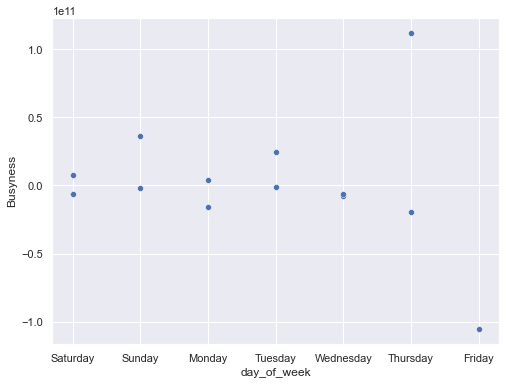

In [216]:
# How I would eventually go about determining the least busy day of the week on average when data is in order
fig = plt.subplots(figsize = (8,6))
sns.scatterplot(data = combined_day_of_week, x = "day_of_week", y = "Busyness")

In [203]:
# How I would eventually go about determining the least busy day of the week on average when data is in order
combined_day_of_week.groupby(['day_of_week'])['Busyness'].mean()

day_of_week
Friday      -1.057986e+11
Monday      -5.862818e+09
Saturday     6.868837e+08
Sunday       1.710852e+10
Thursday     4.637170e+10
Tuesday      1.172223e+10
Wednesday   -6.963742e+09
Name: Busyness, dtype: float64

## Looking at traffic for my home station: Penn Station! 

In [115]:
penn_station = combined[(combined['station'] == '34 ST-PENN STA')]
penn_station.head()

,date_time,c/a,unit,scp,station,linename,division,desc,entries,exits,turnstile
55880,2022-06-18 00:00:00,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,REGULAR,385569,1126777,34 ST-PENN STA_N067_R012_00-00-00
55881,2022-06-18 04:00:00,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,REGULAR,385573,1126781,34 ST-PENN STA_N067_R012_00-00-00
55882,2022-06-18 08:00:00,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,REGULAR,385592,1126827,34 ST-PENN STA_N067_R012_00-00-00
55883,2022-06-18 12:00:00,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,REGULAR,385672,1126927,34 ST-PENN STA_N067_R012_00-00-00
55884,2022-06-18 16:00:00,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,REGULAR,385793,1127045,34 ST-PENN STA_N067_R012_00-00-00


In [112]:
#Check the final rule of broken data to delete (entries/exit mismatch) to see which turnstiles to delete from our chart. Looked ahead to see this would be an issue
combined_turnstiles_to_delete[combined_turnstiles_to_delete['station'] == "34 ST-PENN STA"]

,date_time,c/a,unit,scp,station,linename,division,desc,entries,exits,turnstile,entries_delta,exits_delta,entries_over_exits,exits_over_entries
139385,2022-06-30 22:00:00,R138,R293,00-00-00,34 ST-PENN STA,123ACE,IRT,REGULAR,1795186,614687,34 ST-PENN STA_R138_R293_00-00-00,0.000415,0.001350,0.307013,3.257190
139428,2022-06-30 22:00:00,R138,R293,00-00-01,34 ST-PENN STA,123ACE,IRT,REGULAR,12055412,6213206,34 ST-PENN STA_R138_R293_00-00-01,0.000047,0.000140,0.332515,3.007383
139471,2022-06-30 22:00:00,R138,R293,00-00-02,34 ST-PENN STA,123ACE,IRT,REGULAR,24685496,12957534,34 ST-PENN STA_R138_R293_00-00-02,0.000021,0.000066,0.322436,3.101392


In [121]:
# Delete the above turnstiles from our penn_station data
faulty_penn_station_turnstile = ['34 ST-PENN STA_R138_R293_00-00-02', '34 ST-PENN STA_R138_R293_00-00-01', '34 ST-PENN STA_R138_R293_00-00-00']
penn_station[~penn_station.turnstile.isin(faulty_penn_station_turnstile)]
penn_station

,date_time,c/a,unit,scp,station,linename,division,desc,entries,exits,turnstile
55880,2022-06-18 00:00:00,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,REGULAR,385569,1126777,34 ST-PENN STA_N067_R012_00-00-00
55881,2022-06-18 04:00:00,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,REGULAR,385573,1126781,34 ST-PENN STA_N067_R012_00-00-00
55882,2022-06-18 08:00:00,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,REGULAR,385592,1126827,34 ST-PENN STA_N067_R012_00-00-00
55883,2022-06-18 12:00:00,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,REGULAR,385672,1126927,34 ST-PENN STA_N067_R012_00-00-00
55884,2022-06-18 16:00:00,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,REGULAR,385793,1127045,34 ST-PENN STA_N067_R012_00-00-00
...,...,...,...,...,...,...,...,...,...,...,...
140874,2022-07-01 06:00:00,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,REGULAR,68162815,18975574,34 ST-PENN STA_R142_R293_01-06-01
140875,2022-07-01 10:00:00,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,REGULAR,68162854,18975740,34 ST-PENN STA_R142_R293_01-06-01
140876,2022-07-01 14:00:00,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,REGULAR,68162955,18975903,34 ST-PENN STA_R142_R293_01-06-01
140877,2022-07-01 18:00:00,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,REGULAR,68163021,18976115,34 ST-PENN STA_R142_R293_01-06-01


In [154]:
penn_station_entries = penn_station.groupby(['date_time'], as_index = False)['entries'].sum()
#Include relevant value + disregard aberrations
penn_station_entries = penn_station_entries[(penn_station_entries['entries']<=1533842251) & (penn_station_entries['entries']>=1533367381)]
penn_station_entries['hourly_entries'] =penn_station_entries['entries'] - penn_station_entries['entries'].shift(1)
penn_station_entries

,date_time,entries,hourly_entries
0,2022-06-18 00:00:00,1533367381,NaN
2,2022-06-18 04:00:00,1533368133,752.0
4,2022-06-18 08:00:00,1533369097,964.0
6,2022-06-18 12:00:00,1533373461,4364.0
9,2022-06-18 16:00:00,1533379906,6445.0
...,...,...,...
191,2022-07-01 04:00:00,1533813676,643.0
193,2022-07-01 08:00:00,1533817834,4158.0
196,2022-07-01 12:00:00,1533825208,7374.0
198,2022-07-01 16:00:00,1533833200,7992.0


In [155]:
penn_station_exits = penn_station.groupby(['date_time'], as_index = False)['exits'].sum()
#Include relevant value + disregard aberrations
penn_station_exits = penn_station_exits[(penn_station_exits['exits']<=1690074582) & (penn_station_exits['exits']>=1689222751)]
penn_station_exits['hourly_exits'] =penn_station_exits['exits'] - penn_station_exits['exits'].shift(1)
penn_station_exits

,date_time,exits,hourly_exits
0,2022-06-18 00:00:00,1689222751,NaN
2,2022-06-18 04:00:00,1689224244,1493.0
4,2022-06-18 08:00:00,1689227432,3188.0
6,2022-06-18 12:00:00,1689236995,9563.0
9,2022-06-18 16:00:00,1689250153,13158.0
...,...,...,...
191,2022-07-01 04:00:00,1690018649,960.0
193,2022-07-01 08:00:00,1690024633,5984.0
196,2022-07-01 12:00:00,1690037434,12801.0
198,2022-07-01 16:00:00,1690055855,18421.0


In [191]:
# Joining the two dataframes together
penn_station_entries_exits = pd.merge(penn_station_entries, penn_station_exits, how = "inner", on = ["date_time", "date_time"])
penn_station_entries_exits = penn_station_entries_exits.drop(['entries', 'exits'], axis=1)
penn_station_entries_exits

,date_time,hourly_entries,hourly_exits
0,2022-06-18 00:00:00,NaN,NaN
1,2022-06-18 04:00:00,752.0,1493.0
2,2022-06-18 08:00:00,964.0,3188.0
3,2022-06-18 12:00:00,4364.0,9563.0
4,2022-06-18 16:00:00,6445.0,13158.0
...,...,...,...
76,2022-07-01 04:00:00,643.0,960.0
77,2022-07-01 08:00:00,4158.0,5984.0
78,2022-07-01 12:00:00,7374.0,12801.0
79,2022-07-01 16:00:00,7992.0,18421.0


In [193]:
# Melt the hourly_entries and hourly_exit columns into one for plotting purposes
penn_station_entries_exits_melt = penn_station_entries_exits.melt("date_time",var_name="entries_and_exits",value_name="traffic")
penn_station_entries_exits_melt

,date_time,entries_and_exits,traffic
0,2022-06-18 00:00:00,hourly_entries,NaN
1,2022-06-18 04:00:00,hourly_entries,752.0
2,2022-06-18 08:00:00,hourly_entries,964.0
3,2022-06-18 12:00:00,hourly_entries,4364.0
4,2022-06-18 16:00:00,hourly_entries,6445.0
...,...,...,...
157,2022-07-01 04:00:00,hourly_exits,960.0
158,2022-07-01 08:00:00,hourly_exits,5984.0
159,2022-07-01 12:00:00,hourly_exits,12801.0
160,2022-07-01 16:00:00,hourly_exits,18421.0


[Text(0.5, 1.0, '34 St - Penn Station Hourly Entries and Exits')]

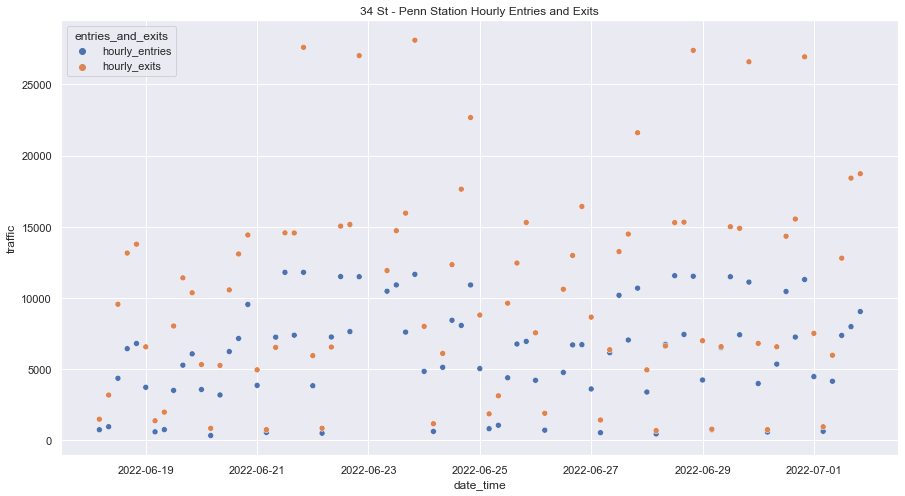

In [201]:
#Plot of Hourly traffic to 34 St - Penn Station 
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(data=penn_station_entries_exits_melt, x="date_time", y="traffic", hue="entries_and_exits").set(title='34 St - Penn Station Hourly Entries and Exits')